In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import os

In [47]:
# Load data
path = os.path.join("..", "..", "data", "csvresults", "rerun_meta.csv")
df = pd.read_csv(path)
df = df.drop('Unnamed: 0', axis=1).set_index("game")
df = df.drop(["Tennis", "Venture", "MontezumaRevenge"])
df.head()

,reg_mae,reg_mse,reg_loss,hl_mae,hl_mse,hl_loss
game,,,,,,
Freeway,0.003798,0.000170,0.000170,0.002601,0.000236,2.145384
Riverraid,0.028430,0.002003,0.002003,0.024746,0.001922,2.642684
Bowling,0.000401,0.000015,0.000015,0.000109,0.000001,2.122431
Frostbite,0.019399,0.001202,0.001202,0.018426,0.001464,2.422354
Krull,0.051510,0.006382,0.006381,0.042770,0.005158,2.993758


In [48]:
# Select variable to test for mean zero

#Y = (df["hlg_val_mae"].to_numpy() / df["reg_val_mae"].to_numpy()) - 1
#Y = np.sqrt(df["hlg_val_mse"].to_numpy()) / np.sqrt(df["reg_val_mse"].to_numpy()) - 1
Y = np.log(df["hl_mae"].to_numpy() / df["reg_mae"].to_numpy())
#Y = np.log(df["hl_mae"].to_numpy()) - np.log(df["reg_mae"].to_numpy())

# Y = np.log(np.sqrt(df["hl_mse"].to_numpy()) / np.sqrt(df["reg_mse"].to_numpy()))
# Y = np.log(np.sqrt(df["hl_mse"].to_numpy())) - np.log(np.sqrt(df["reg_mse"].to_numpy()))

#Y = np.sqrt(df["hlg_val_mse"].to_numpy()) - np.sqrt(df["reg_val_mse"].to_numpy())
#Y = df["hlg_val_mae"].to_numpy() - df["reg_val_mae"].to_numpy()
Y

array([-3.78526792e-01, -1.38775479e-01, -1.30679160e+00, -5.14480817e-02,
       -1.85930644e-01, -6.70592268e-02, -9.57751070e-02, -2.54151346e-02,
       -1.06394342e-01,  3.24688515e-02, -7.60015926e-02,  1.50694327e-04,
       -7.28075904e-02, -2.99632338e-01, -2.32363145e-01, -5.29005107e-02,
       -5.01591493e-01, -2.67413807e-02, -1.63971690e-01, -7.95313952e-02,
       -1.67289605e-01, -3.08099388e-01, -3.01041930e-01, -3.66046151e-01,
       -2.34328995e-01, -7.71423945e-02, -9.87497381e-02, -2.97153202e-01,
       -1.34622169e-01, -2.76259376e-01, -1.89454853e-01, -1.26857472e-01,
       -5.01678008e-01, -4.34141254e-02, -3.80538109e-01, -6.80562413e-02,
       -5.36272609e-01, -7.10444820e-02, -9.69660803e-02, -3.65133549e-01,
       -2.63590871e-01, -6.07663322e-01, -1.03215278e+00, -1.07172123e-01,
       -1.81639493e+00,  2.23874792e-01, -1.00472309e+00, -1.67359196e-01,
       -1.04837157e+00, -2.96789405e-01, -9.03151397e-01, -2.60611448e+00,
       -5.33777266e-01, -

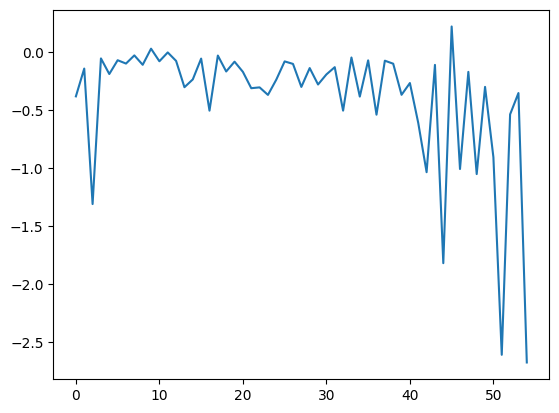

In [49]:
# Plot Y
plt.plot(Y)
plt.show()

In [50]:
# Compute estimated mean, standard error, test statistic
n = len(Y)
b_hat = np.mean(Y)
se_b = np.std(Y, ddof=1) / np.sqrt(n)
t = b_hat / se_b
b_hat, se_b, t

(-0.393722839785191, 0.07695436261911384, -5.116316039597716)

In [51]:
# Compute confidence interval
alpha = 0.05
t_star = stats.t.ppf(1 - alpha / 2, n - 1)
low = b_hat - t_star * se_b
high = b_hat + t_star * se_b

low, high

(-0.5480070474111814, -0.23943863215920055)

In [52]:
# Compute one-sided p-value
p_val = stats.t.cdf(-abs(t), n - 1)
p_val

2.1199305307192595e-06